In [58]:
# A necessary evil
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import astropy.units as u
from astropy.time import Time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from datetime import datetime, timezone, timedelta

from Utilities import TimeRange
from Io import fgs_is_tracking_direct, fgs_use_angular_rate_direct, fgs_active_pecs_direct, load_stars_table_direct
from Fgs import FgsStarTrackingInterval, FgsStarTrackingIntervalStatistics, fgs_star_tracking_intervals_to_json_file, fgs_star_tracking_intervals_from_json_file, fgs_star_tracking_interval_statistics_to_json_file, fgs_star_tracking_interval_statistics_from_json_file

### JSON de- and serialization of interval statistics

In [60]:
# JSON de- and serializationintervals_statistics2 = fgs_star_tracking_interval_statistics_from_json_file('fgs_star_tracking_interval_statistics.json')
interval_statistics1 = fgs_star_tracking_interval_statistics_from_json_file('pretestperiod.json')
interval_statistics2 = fgs_star_tracking_interval_statistics_from_json_file('fgstestperiod1.json')

In [61]:
print(len(interval_statistics1), len(interval_statistics2))

415 385


### Basic plots

In [62]:
x_median_std_pec1_1 = [stats.x_median_std_pec1 for stats in interval_statistics1]
x_median_std_pec2_1 = [stats.x_median_std_pec2 for stats in interval_statistics1]
y_median_std_pec1_1 = [stats.y_median_std_pec1 for stats in interval_statistics1]
y_median_std_pec2_1 = [stats.y_median_std_pec2 for stats in interval_statistics1]
x_median_drift_pec1_1 = [abs(stats.x_median_drift_pec1) for stats in interval_statistics1]
x_median_drift_pec2_1 = [abs(stats.x_median_drift_pec2) for stats in interval_statistics1]
y_median_drift_pec1_1 = [abs(stats.y_median_drift_pec1) for stats in interval_statistics1]
y_median_drift_pec2_1 = [abs(stats.y_median_drift_pec2) for stats in interval_statistics1]
duration_s_1 = [(stats.time_end - stats.time_start).to(u.s).value for stats in interval_statistics1]
n_stars_1 = [len(stats.x_medians_pec1) + len(stats.x_medians_pec2) for stats in interval_statistics1]

In [63]:
x_median_std_pec1_2 = [stats.x_median_std_pec1 for stats in interval_statistics2]
x_median_std_pec2_2 = [stats.x_median_std_pec2 for stats in interval_statistics2]
y_median_std_pec1_2 = [stats.y_median_std_pec1 for stats in interval_statistics2]
y_median_std_pec2_2 = [stats.y_median_std_pec2 for stats in interval_statistics2]
x_median_drift_pec1_2 = [abs(stats.x_median_drift_pec1) for stats in interval_statistics2]
x_median_drift_pec2_2 = [abs(stats.x_median_drift_pec2) for stats in interval_statistics2]
y_median_drift_pec1_2 = [abs(stats.y_median_drift_pec1) for stats in interval_statistics2]
y_median_drift_pec2_2 = [abs(stats.y_median_drift_pec2) for stats in interval_statistics2]
duration_s_2 = [(stats.time_end - stats.time_start).to(u.s).value for stats in interval_statistics2]
n_stars_2 = [len(stats.x_medians_pec1) + len(stats.x_medians_pec2) for stats in interval_statistics2]

### std PEC1 x PEC2

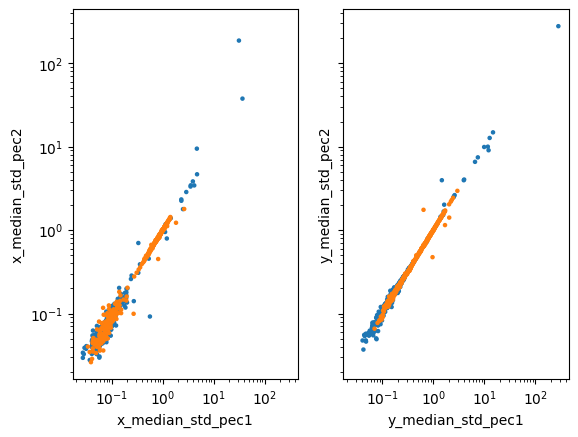

In [64]:
fig, axs = plt.subplots(1, 2, sharex='all', sharey='all')
axs[0].scatter(x_median_std_pec1_1, x_median_std_pec2_1, s=np.full(len(x_median_std_pec1_1), 5))
axs[0].scatter(x_median_std_pec1_2, x_median_std_pec2_2, s=np.full(len(x_median_std_pec1_2), 5))
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('x_median_std_pec1')
axs[0].set_ylabel('x_median_std_pec2')
axs[1].scatter(y_median_std_pec1_1, y_median_std_pec2_1, s=np.full(len(y_median_std_pec1_1), 5))
axs[1].scatter(y_median_std_pec1_2, y_median_std_pec2_2, s=np.full(len(y_median_std_pec1_2), 5))
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('y_median_std_pec1')
axs[1].set_ylabel('y_median_std_pec2')
plt.show()

### drift PEC1 x PEC2

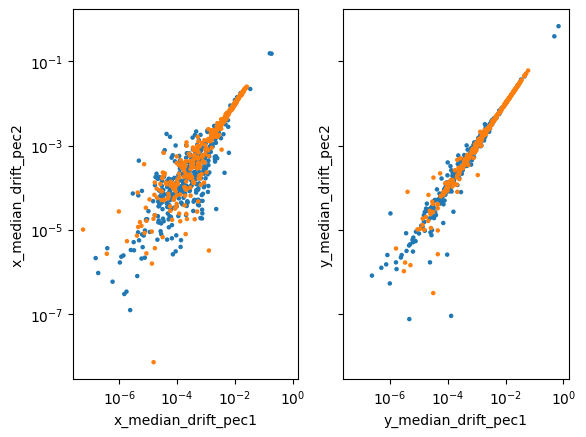

In [65]:
fig, axs = plt.subplots(1, 2, sharex='all', sharey='all')
axs[0].scatter(x_median_drift_pec1_1, x_median_drift_pec2_1, s=np.full(len(x_median_drift_pec1_1), 5))
axs[0].scatter(x_median_drift_pec1_2, x_median_drift_pec2_2, s=np.full(len(x_median_drift_pec1_2), 5))
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('x_median_drift_pec1')
axs[0].set_ylabel('x_median_drift_pec2')
axs[1].scatter(y_median_drift_pec1_1, y_median_drift_pec2_1, s=np.full(len(y_median_drift_pec1_1), 5))
axs[1].scatter(y_median_drift_pec1_2, y_median_drift_pec2_2, s=np.full(len(y_median_drift_pec1_2), 5))
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('y_median_drift_pec1')
axs[1].set_ylabel('y_median_drift_pec2')
plt.show()

### std x drift

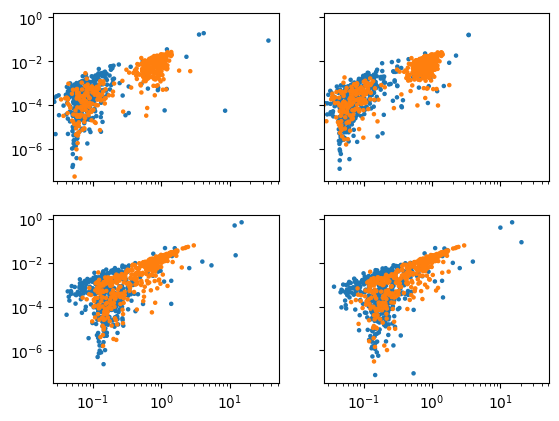

In [66]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
axs[0,0].scatter(x_median_std_pec1_1, x_median_drift_pec1_1, s=np.full(len(x_median_std_pec1_1), 5))
axs[0,0].scatter(x_median_std_pec1_2, x_median_drift_pec1_2, s=np.full(len(x_median_std_pec1_2), 5))
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].scatter(x_median_std_pec2_1, x_median_drift_pec2_1, s=np.full(len(x_median_std_pec2_1), 5))
axs[0,1].scatter(x_median_std_pec2_2, x_median_drift_pec2_2, s=np.full(len(x_median_std_pec2_2), 5))
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].scatter(y_median_std_pec1_1, y_median_drift_pec1_1, s=np.full(len(y_median_std_pec1_1), 5))
axs[1,0].scatter(y_median_std_pec1_2, y_median_drift_pec1_2, s=np.full(len(y_median_std_pec1_2), 5))
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].scatter(y_median_std_pec2_1, y_median_drift_pec2_1, s=np.full(len(y_median_std_pec2_1), 5))
axs[1,1].scatter(y_median_std_pec2_2, y_median_drift_pec2_2, s=np.full(len(y_median_std_pec2_2), 5))
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### duration x drift

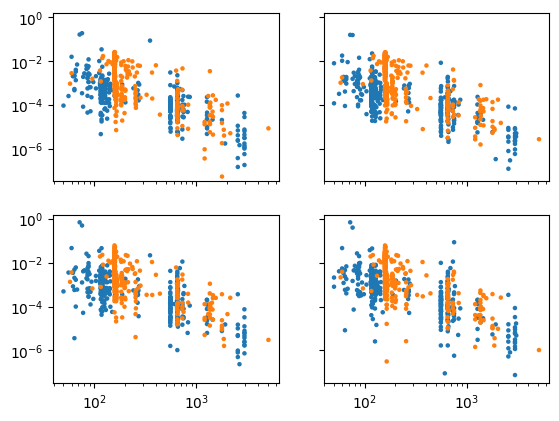

In [67]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
axs[0,0].scatter(duration_s_1, x_median_drift_pec1_1, s=np.full(len(duration_s_1), 5))
axs[0,0].scatter(duration_s_2, x_median_drift_pec1_2, s=np.full(len(duration_s_2), 5))
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].scatter(duration_s_1, x_median_drift_pec2_1, s=np.full(len(duration_s_1), 5))
axs[0,1].scatter(duration_s_2, x_median_drift_pec2_2, s=np.full(len(duration_s_2), 5))
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].scatter(duration_s_1, y_median_drift_pec1_1, s=np.full(len(duration_s_1), 5))
axs[1,0].scatter(duration_s_2, y_median_drift_pec1_2, s=np.full(len(duration_s_2), 5))
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].scatter(duration_s_1, y_median_drift_pec2_1, s=np.full(len(duration_s_1), 5))
axs[1,1].scatter(duration_s_2, y_median_drift_pec2_2, s=np.full(len(duration_s_2), 5))
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### duration x std

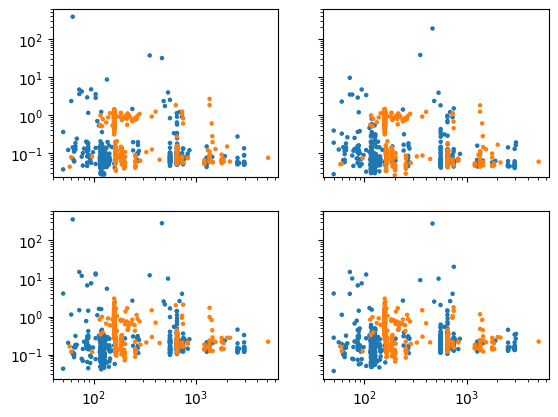

In [68]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
axs[0,0].scatter(duration_s_1, x_median_std_pec1_1, s=np.full(len(duration_s_1), 5))
axs[0,0].scatter(duration_s_2, x_median_std_pec1_2, s=np.full(len(duration_s_2), 5))
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].scatter(duration_s_1, x_median_std_pec2_1, s=np.full(len(duration_s_1), 5))
axs[0,1].scatter(duration_s_2, x_median_std_pec2_2, s=np.full(len(duration_s_2), 5))
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].scatter(duration_s_1, y_median_std_pec1_1, s=np.full(len(duration_s_1), 5))
axs[1,0].scatter(duration_s_2, y_median_std_pec1_2, s=np.full(len(duration_s_2), 5))
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].scatter(duration_s_1, y_median_std_pec2_1, s=np.full(len(duration_s_1), 5))
axs[1,1].scatter(duration_s_2, y_median_std_pec2_2, s=np.full(len(duration_s_2), 5))
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### n_stars x std

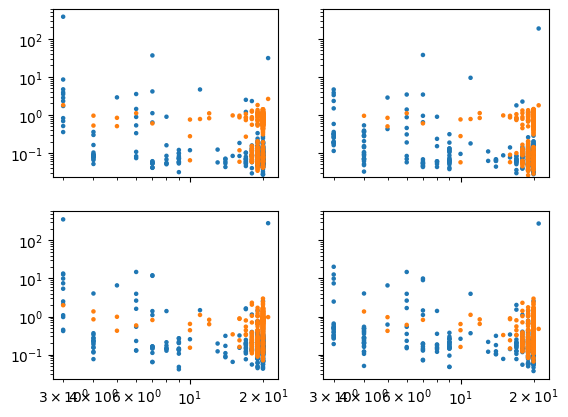

In [69]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
axs[0,0].scatter(n_stars_1, x_median_std_pec1_1, s=np.full(len(n_stars_1), 5))
axs[0,0].scatter(n_stars_2, x_median_std_pec1_2, s=np.full(len(n_stars_2), 5))
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].scatter(n_stars_1, x_median_std_pec2_1, s=np.full(len(n_stars_1), 5))
axs[0,1].scatter(n_stars_2, x_median_std_pec2_2, s=np.full(len(n_stars_2), 5))
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].scatter(n_stars_1, y_median_std_pec1_1, s=np.full(len(n_stars_1), 5))
axs[1,0].scatter(n_stars_2, y_median_std_pec1_2, s=np.full(len(n_stars_2), 5))
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].scatter(n_stars_1, y_median_std_pec2_1, s=np.full(len(n_stars_1), 5))
axs[1,1].scatter(n_stars_2, y_median_std_pec2_2, s=np.full(len(n_stars_2), 5))
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### n_stars x drift

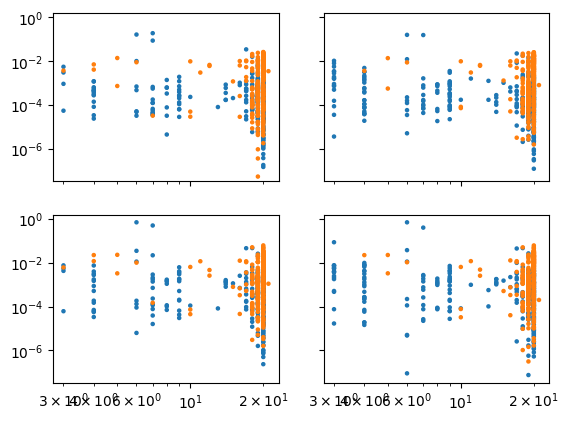

In [70]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='all')
axs[0,0].scatter(n_stars_1, x_median_drift_pec1_1, s=np.full(len(n_stars_1), 5))
axs[0,0].scatter(n_stars_2, x_median_drift_pec1_2, s=np.full(len(n_stars_2), 5))
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,1].scatter(n_stars_1, x_median_drift_pec2_1, s=np.full(len(n_stars_1), 5))
axs[0,1].scatter(n_stars_2, x_median_drift_pec2_2, s=np.full(len(n_stars_2), 5))
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[1,0].scatter(n_stars_1, y_median_drift_pec1_1, s=np.full(len(n_stars_1), 5))
axs[1,0].scatter(n_stars_2, y_median_drift_pec1_2, s=np.full(len(n_stars_2), 5))
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,1].scatter(n_stars_1, y_median_drift_pec2_1, s=np.full(len(n_stars_1), 5))
axs[1,1].scatter(n_stars_2, y_median_drift_pec2_2, s=np.full(len(n_stars_2), 5))
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
plt.show()

### durations

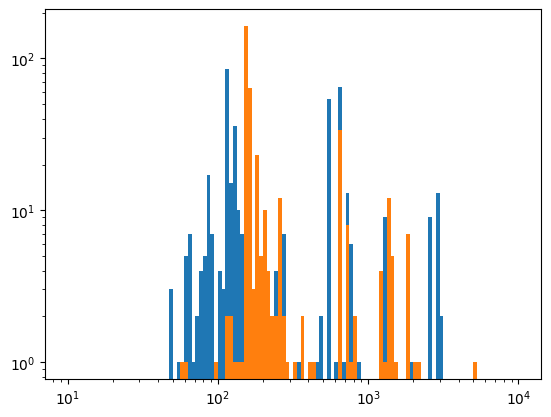

In [71]:
plt.hist(duration_s_1, bins=np.geomspace(10,10000, 121))
plt.hist(duration_s_2, bins=np.geomspace(10,10000, 121))
plt.xscale('log')
plt.yscale('log')
plt.show()